# ***The tasks:***
For this chapter, you will have to do the following:

• Create a Jupyter notebook with a clean code.

• If your classes are expressed as non-numerical features, map them
to numbers, for example, 0, 1, 2, etc.

• Study the correlation between features, find the features subset with
the highest correlation with the target column, and try to explain from
the business point of view why they have such a big correlation.

• Create a second set of data with the columns that have an absolute
correlation between 0.5 and 0.8 with the target column.

• Split the data into 2 sub-sets using the train test split function from
sklearn.

• Train a sklearn Logistic Regression model on the data provided to
you.
• Train a from-scratch implementation of Logistic Regression on the
train sub-set.

• Test the models on the test sets from the initial data set. For error,
metric use the accuracy score function from sklearn.metrics.

• Split the data with the selected columns into 2 sub-sets using the
train test split function from sklearn.

• Train a sklearn Logistic Regression model on the data with selected
columns (train subset).

• Train a from-scratch implementation of Logistic Regression on the
train sub-set.
12

• Test the models on the test sets from the initial data set. For error,
metric use the accuracy score function from sklearn.metrics.

• Please try to interpret the results you are getting by comparing the
model’s accuracy on the test sets.

• Please comment on your code

Logistic vs Linear. Logistic regression would  predict male or female this person is linear regression how fast a sickness could evolve


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [23]:
dt=pd.read_csv("heart.csv")
dt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


One Hot Encoding

In [35]:
# Преобразуем категориальные переменные во всём датафрейме
dt_encoded = pd.get_dummies(dt, drop_first=True)  # включает и числовые, и категориальные

# Строим корреляционную матрицу
correlations = dt_encoded.corr()

# Выводим только корреляции с целевой переменной 'HeartDisease'
target_correlations = correlations['HeartDisease'].sort_values(ascending=False)
print(target_correlations)


HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.107589
RestingECG_ST        0.102527
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


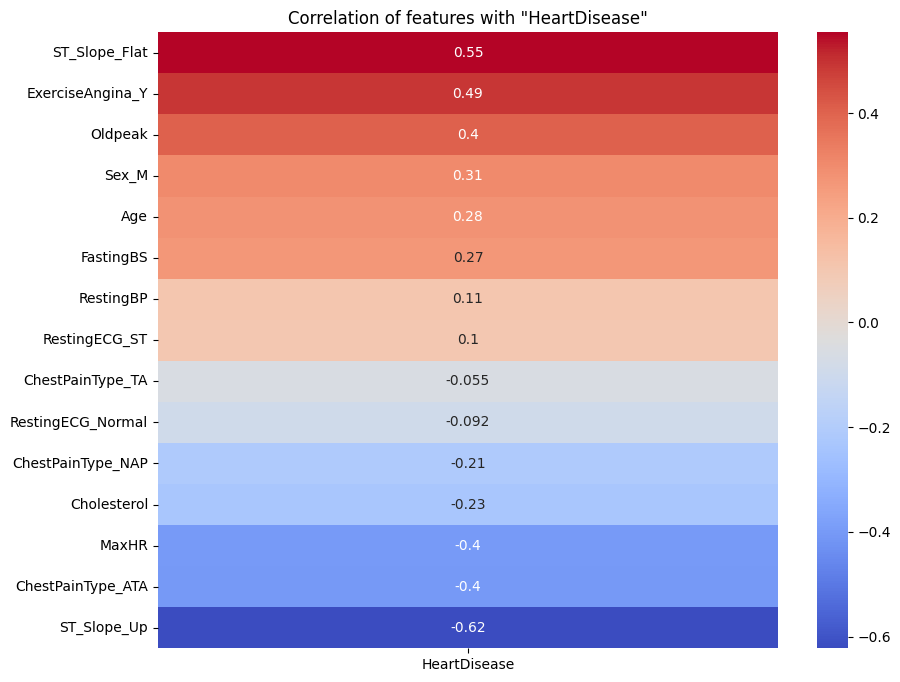

In [36]:
target_column = 'HeartDisease'

# Вычисляем корреляции с целевой переменной
correlations = dt_encoded.corr()[target_column].drop(target_column).sort_values(ascending=False)

# Отображаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Correlation of features with "{target_column}"')
plt.show()

• Create a second set of data with the columns that have an absolute correlation between 0.5 and 0.8 with the target column.

In [37]:
high_corr_features = correlations[abs(correlations) > 0.8].index.tolist()
moderate_corr_features = correlations[(abs(correlations) >= 0.5) & (abs(correlations) <= 0.8)].index.tolist()
print(high_corr_features)
print( moderate_corr_features)

[]
['ST_Slope_Flat', 'ST_Slope_Up']


• Split the data into 2 sub-sets using the train test split function from sklearn.

In [38]:
X = dt_encoded.drop("HeartDisease", axis=1)
y = dt_encoded["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (734, 15)
Test shape: (184, 15)



• Train a sklearn Logistic Regression model on the data provided to you.

• Train a from-scratch implementation of Logistic Regression on the train sub-set.

Sklearn Logistic Regression

У меня получилась слошком маленькая точность и я применила standart scaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model_sklearn = LogisticRegression(max_iter=5000)
model_sklearn.fit(X_train, y_train)

y_pred_sklearn = model_sklearn.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn Logistic Regression Accuracy: {acc_sklearn:.4f}")


Sklearn Logistic Regression Accuracy: 0.8533


Logistic regression

In [50]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted > 0.5, 1, 0)


Adaug variantele float

In [53]:
X_train_np = X_train.values.astype(np.float64)
X_test_np = X_test.values.astype(np.float64)
y_train_np = y_train.values.astype(np.float64)

In [55]:
model_scratch = LogisticRegressionScratch()
model_scratch.fit(X_train_np, y_train_np)


In [56]:
y_pred_scratch = model_scratch.predict(X_test_np)
acc_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"From-Scratch Logistic Regression Accuracy: {acc_scratch:.4f}")

From-Scratch Logistic Regression Accuracy: 0.8098


In [57]:
print("\nСравнение моделей:")
print(f"Sklearn Logistic Regression Accuracy:     {acc_sklearn:.4f}")
print(f"From-Scratch Logistic Regression Accuracy: {acc_scratch:.4f}")


Сравнение моделей:
Sklearn Logistic Regression Accuracy:     0.8098
From-Scratch Logistic Regression Accuracy: 0.8098
